In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import red_tables.utils.paths as path
import os
import red_tables.utils.funtions as funtions

ModuleNotFoundError: No module named 'red_tables'

Creando dataset tensorflow

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
train_dir = path.data_processed_dir('train')
test_dir = path.data_processed_dir('test')
val_dir = path.data_processed_dir('validation')

In [ ]:
print(len(os.listdir(path.data_processed_dir('train','1X1')))*9)
print(len(os.listdir(path.data_processed_dir('test','1X1')))*9)
print(len(os.listdir(path.data_processed_dir('validation','1X1')))*9)

1440
180
180


In [ ]:
epoch_steps = 1440 // 32
test_steps = 180 // 32

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
ih, iw = 320, 200 #tamano de la imagen
train_datagen = ImageDataGenerator(rotation_range=1,
                                   rescale=1./255,
                                   horizontal_flip=True)

train = train_datagen.flow_from_directory(train_dir,
                batch_size=32,
                target_size=(iw, ih),
                class_mode='categorical',
                color_mode='grayscale'
                                     )

gentest = ImageDataGenerator(rescale=1./255)

test = gentest.flow_from_directory(test_dir,
                batch_size=32,
                target_size=(iw, ih),
                class_mode='categorical',
                color_mode='grayscale'
                )
genval = ImageDataGenerator(rescale=1./255)

val = genval.flow_from_directory(val_dir,
                batch_size=32,
                target_size=(iw, ih),
                class_mode='categorical',
                color_mode='grayscale'
                )

Found 1440 images belonging to 9 classes.
Found 180 images belonging to 9 classes.
Found 180 images belonging to 9 classes.


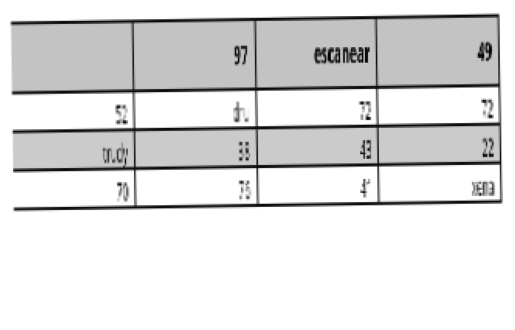

In [ ]:
for i,j in train:
    plt.imshow(i[2],cmap='gray')
    plt.axis('Off')
    plt.show()
    break